# Machine Learning Model for Song Prediction

## Neural Network Model

#### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#### Import Data and Clean Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

all_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merged_all_df.csv")

corr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/corr_spotify-New.csv")

Mounted at /content/drive


In [3]:
all_data = all_data.drop('Unnamed: 0', axis=1)

In [4]:
all_data = all_data.drop_duplicates(subset='track_id')

In [5]:
all_data

track_id  popularity  acousticness  danceability  \
0      3VAX2MJdmdqARLSU5hPMpm          31          0.86          0.72   
1      01zME4q62SDPtD0hOSmTrG          47          0.10          0.75   
2      2Dh5wED4UVeiBqneUdc5Gy          35          0.19          0.61   
3      2hX9xFhvz0LTYJ7KvcENMl           7          0.68          0.68   
4      58QDB1sKe1wHZEvngevtGE          55          0.08          0.47   
...                       ...         ...           ...           ...   
49275  4L820y58kEWkXldgfjCDbg           7          0.04          0.78   
49276  1GR1U3xkN1gf8dzvcyGxfa          53          0.10          0.59   
49277  4e5wI6VC4eVDTtpyZ409Pw          41          0.01          0.60   
49278  58nHFSWj5N5JxNtWgS85TL          44          0.00          0.18   
49279  1pXtUVmSS3Aky3j6nQ4sQT          55          0.33          0.72   

       disc_number  duration_ms  energy  instrumentalness  key  liveness  ...  \
0                1     2.154012    0.31              0.00    6      0.25  ...   
1                1    -0.047806    0.67              0.00    6      0.10  ...   
2                1    -0.016299    0.66              0.04    5      0.12  ...   
3                1     1.789076    0.25              0.00    7      0.18  ...   
4                1    -0.468785    0.83              0.00    9      0.18  ...   
...            ...          ...     ...               ...  ...       ...  ...   
49275            1    -0.135970    0.66              0.00   11      0.37  ...   
49276            1    -0.230340    0.79              0.00   10      0.08  ...   
49277            1    -0.356444    0.90              0.00   11      0.09  ...   
49278            1    -0.176641    0.82              0.01    7      0.24  ...   
49279            1    -0.118877    0.75              0.00    9      0.09  ...   

       album_type_compilation  album_type_single  type_album  \
0                         0.0                0.0         1.0   
1                         0.0                1.0         1.0   
2                         0.0                1.0         1.0   
3                         0.0                0.0         1.0   
4                         0.0                1.0         1.0   
...                       ...                ...         ...   
49275                     0.0                0.0         1.0   
49276                     0.0                0.0         1.0   
49277                     0.0                0.0         1.0   
49278                     0.0                0.0         1.0   
49279                     0.0                0.0         1.0   

       release_date_precision_day  release_date_precision_month  \
0                             1.0                           0.0   
1                             1.0                           0.0   
2                             1.0                           0.0   
3                             1.0                           0.0   
4                             1.0                           0.0   
...                           ...                           ...   
49275                         1.0                           0.0   
49276                         0.0                           0.0   
49277                         1.0                           0.0   
49278                         0.0                           0.0   
49279                         1.0                           0.0   

       release_date_precision_year  year  month  day  weekday  
0                              0.0  2011      3    1        1  
1                              0.0  2018      9    7        4  
2                              0.0  2018      6   22        4  
3                              0.0  2010      2    1        0  
4                              0.0  2018     12   21        4  
...                            ...   ...    ...  ...      ...  
49275                          0.0  2018     11    9        4  
49276                          1.0  2004      1    1        3  
49277                

In [6]:
corr

Unnamed: 0 Percentage
0               pop_bins     100.0%
1             popularity     94.75%
2      artist_popularity     73.99%
3             country_AR     21.62%
4             MFCC_PCA_3     21.35%
..                   ...        ...
135                  day      4.04%
136      electronic trap      4.01%
137           german pop      3.98%
138    alternative dance      3.93%
139  mean_syllables_word      3.91%

[140 rows x 2 columns]

In [8]:
"""
Define the column of the dataframe we want to keep and use as input in the model.
Defined from a threshold of 4% correlation with popularity bins. 
"""
column_keep = corr['Unnamed: 0'].to_list()
column_keep.remove('popularity')
column_keep.remove('pop_bins')

#### Check distribution of popularity

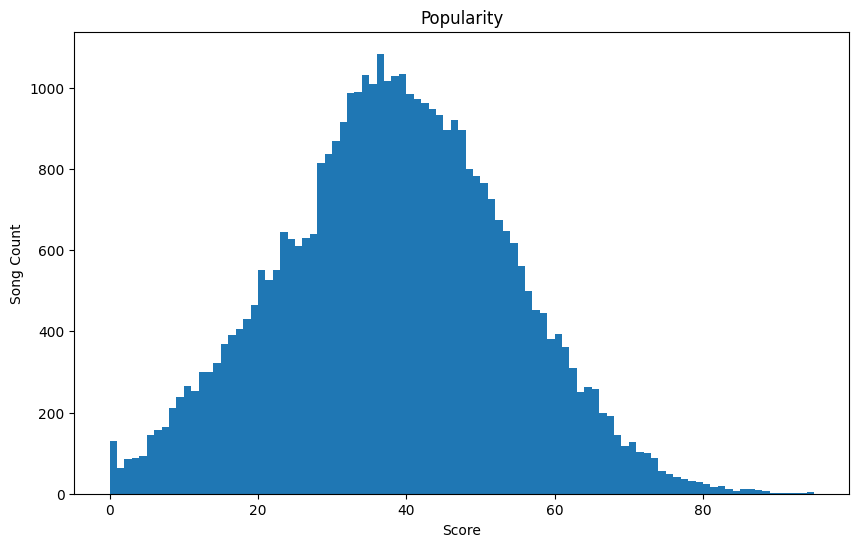

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
all_data['popularity'].hist(bins=95, ax=ax)
ax.grid(False)
ax.set(title='Popularity', xlabel='Score', ylabel='Song Count')
plt.show()

#### Cut the popularity column into bins

In [10]:
all_data['pop_bins'] = pd.qcut(x=all_data['popularity'], q=5, labels=False)

all_data['pop_bins'].value_counts()

0    8393
2    8093
1    7715
3    7669
4    7571
Name: pop_bins, dtype: int64

#### Build Neural Network

In [11]:
# Define X and y
X = all_data[column_keep]
y = all_data['pop_bins']
y_cat = to_categorical(y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# normalize numeric features
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8896      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 11,141
Trainable params: 11,141
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# evaluate the performance of the model on the testing set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/50
986/986 [==============================] - 5s 3ms/step - loss: 427.3414 - accuracy: 0.2818 - val_loss: 1.5950 - val_accuracy: 0.2909
Epoch 2/50
986/986 [==============================] - 4s 4ms/step - loss: 228.0423 - accuracy: 0.3045 - val_loss: 1.5643 - val_accuracy: 0.3037
Epoch 3/50
986/986 [==============================] - 2s 2ms/step - loss: 129.6311 - accuracy: 0.3273 - val_loss: 1.5469 - val_accuracy: 0.3218
Epoch 4/50
986/986 [==============================] - 2s 2ms/step - loss: 84.4518 - accuracy: 0.3166 - val_loss: 1.5364 - val_accuracy: 0.3194
Epoch 5/50
986/986 [==============================] - 2s 2ms/step - loss: 1.6037 - accuracy: 0.2688 - val_loss: 1.5411 - val_accuracy: 0.3109
Epoch 6/50
986/986 [==============================] - 2s 2ms/step - loss: 1.5659 - accuracy: 0.2771 - val_loss: 1.5449 - val_accuracy: 0.2978
Epoch 7/50
986/986 [==============================] - 3s 3ms/step - loss: 1.5307 - accuracy: 0.2890 - val_loss: 1.5525 - val_accuracy: 0.2782